<a href="https://colab.research.google.com/github/poojaanbu0/basic-nn-model/blob/main/exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('datasheet').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'int'})
df = df.astype({'Output':'int'})
df.head()

,Input,Output
0,1,67
1,2,68
2,3,88
3,4,67
4,5,45


In [ ]:
X = df[['Input']].values
y = df[['Output']].values

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
marks_data = Sequential([Dense(4,activation='relu'),Dense(8,activation='relu'),Dense(5,activation='relu'),Dense(1)])

In [ ]:
marks_data.compile(optimizer = 'rmsprop' , loss = 'mae')

In [ ]:
marks_data.fit(X_train1 , y_train,epochs = 500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 92.9839
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 92.9615
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 92.9459
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 92.9330
Epoch 5/500
1/1 [==============================] - 0s 27ms/step - loss: 92.9215
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 92.9110
Epoch 7/500
1/1 [==============================] - 0s 24ms/step - loss: 92.9012
Epoch 8/500
1/1 [==============================] - 0s 21ms/step - loss: 92.8919
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 92.8830
Epoch 10/500
1/1 [==============================] - 0s 15ms/step - loss: 92.8743
Epoch 11/500
1/1 [==============================] - 0s 17ms/step - loss: 92.8659
Epoch 12/500
1/1 [==============================] - 0s 27ms/step - loss: 92.8577
Epoch 13/500
1/1 [=====================

<Axes: >

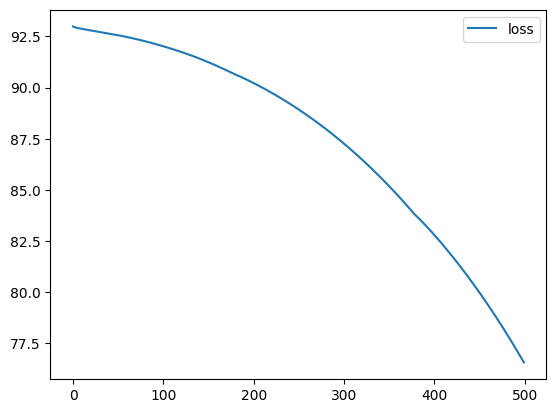

In [ ]:
loss_df = pd.DataFrame(marks_data.history.history)

loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

marks_data.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 34ms/step - loss: 75.0984


75.09835052490234

In [ ]:
X_n1 = [[30]]

X_n1_1 = Scaler.transform(X_n1)

marks_data.predict(X_n1_1)

1/1 [==============================] - 0s 27ms/step


array([[26.57043]], dtype=float32)